### NEURON KO

array([ 2.12475338e-04,  0.00000000e+00,  0.00000000e+00,  1.51768098e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -8.95700000e+01,
        1.60000000e+00])
soma { nseg=1  L=4.57968  Ra=100
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=4.57968}
	insert capacitance { cm=1.6}
}
soma { nseg=1  L=4.57968  Ra=100
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=4.57968}
	insert capacitance { cm=1.6}
	insert egl19 { gbar_egl19=0.000151768}
	insert slo1egl19 { gbar_slo1egl19=0}
	insert nca { gbar_nca=0 e_nca=30}
	insert leak { gbar_leak=0.000212475 e_leak=-89.57}
	insert slo1iso { gbar_slo1iso=0 c1_slo1iso=1}
	insert ca_ion { cai=5e-05 cao=2}
	insert kqt1 { gbar_kqt1=0}
	insert shl1 { gbar_shl1=0}
	insert k_ion { ek=-80}
	insert IClamp { del=1000 dur=5000 amp=10}
}


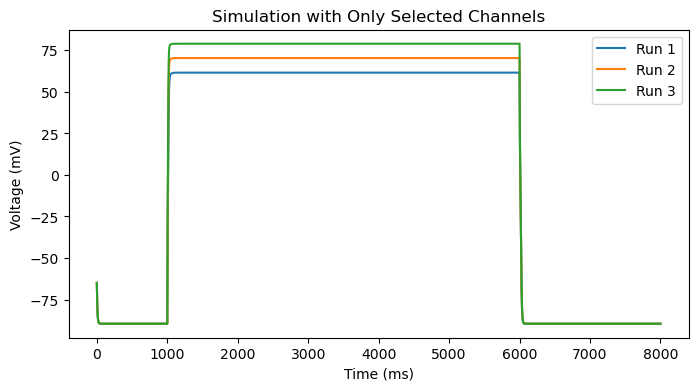

In [7]:

import sys
sys.path.append('..')  # the parent directory
from AIY_simulation_iclamp import AIY_simulation_iclamp
from g_to_Scm2 import gScm2
import pprint

surf=65.89e-8# surface in cm^2 form neuromorpho AIYL
gAIY=[0.14,1,0.2,0.1,0.92,0.06,0.5,-89.57,1.6]

# leak, slo1iso, kqt1, egl19, slo1egl19, nca, shl1, eleak
    # leak = 0.14
    # slo1iso = 1 
    # kqt1 = 0.2
    # egl19 = 0.1
    # slo1egl19 = 0.92
    # nca = 0.06
    # shl1 = 0.5



# leak
gAIY = [0.14, 0, 0, 0, 0, 0.06, 0, -89.57, 1.6]

# slo1iso
gAIY = [0.14, 1, 0, 0, 0, 0.06, 0, -89.57, 1.6]

# kqt1 
#gAIY = [0.14, 0, 0.2, 0, 0, 0.06, 0, -89.57, 1.6]

# egl19 
gAIY = [0.14, 0, 0, 0.1, 0, 0, 0, -89.57, 1.6]

#slo1egl19
# gAIY = [0.14, 0, 0, 0, 0.92, 0.06, 0, -89.57, 1.6]


# # shl1
# gAIY = [0.14, 0, 0, 0, 0, 0, 0.5, -89.57, 1.6]

 
# # egl19 + slo1egl19
# gAIY = [0.14, 0, 0, 0.1, 0.92, 0, 0, -89.57, 1.6]

  
        
gAIY_scaled = gScm2(gAIY,surf,6)
pprint.pprint(gAIY_scaled)

        


v, time1, vi_peak, vi = AIY_simulation_iclamp(gAIY_scaled, s1=0.015, s2=0.019, ns=3)
#s2 = 0.035
# best_cc=AIY_simulation_iclamp(gbest,-0.015,0.035,11)
# best_voltage=best_cc[0]
# best_time2=best_cc[1]
# best_VIss=best_cc[3]
# best_VIpeaks=best_cc[2]



# #Matplotlib


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))


for i in range(len(v)):
    plt.plot(time1[i], v[i], label=f'Run {i + 1}', linewidth=1.5)


plt.title('Simulation with Only Selected Channels')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')


plt.legend()
plt.show()





#Plotly
# # Plotting
# import plotly.graph_objects as go

# fig = go.Figure()
# for i in range(len(v)):
#     fig.add_trace(
#         go.Scatter(
#             x=time1[i], 
#             y=v[i], 
#             mode='lines', 
#             name=f'Run {i + 1}'  # Label each run
#         )
#     )
# fig.update_layout(
#     title='Simulation with Only ___ Channel',
#     xaxis_title='Time (ms)',
#     yaxis_title='Voltage (mV)',
#     template='plotly_white' ,
#     width = 800,
#     height = 400
# )
# fig.show()


### NeuroML 

In [15]:
import pandas as pd
from pyneuroml import pynml

def run_simulation_and_get_results(lems_file):
    # Run the simulation with pyNeuroML
    print(f"Running simulation: {lems_file}")
    results = pynml.run_lems_with_jneuroml(
        lems_file, 
        max_memory="1024M", 
        nogui=True, 
        plot=False, 
        load_saved_data=True
    )

    # time and variable values
    time = results["t"]
    voltage_data = {}
    for key in results:
        if key.startswith("pop_AIY") and key.endswith("/v"):  # Filter voltage keys
            compartment = key.split("/")[1]  # Extract compartment index
            voltage_data[f"Run {compartment}"] = results[key]
    
    
    df = pd.DataFrame(voltage_data)
    df.insert(0, "Time (ms)", time)  # Add time as the first column
    return df


lems_file = "LEMS_Sim_IClamp_AIY.xml" 
df_AIY_NML = run_simulation_and_get_results(lems_file)
df_AIY_NML = df_AIY_NML * 1000 # Convert voltage from V to mV and time from s to ms
nml_time = df_AIY_NML.iloc[:, 0]
nml_voltages = df_AIY_NML.iloc[:, 1:4]

pyNeuroML >>> INFO - Loading LEMS file: LEMS_Sim_IClamp_AIY.xml and running with jNeuroML
pyNeuroML >>> INFO - Executing: (java -Xmx1024M  -Djava.awt.headless=true -jar  "/Users/dakosh/mambaforge/lib/python3.10/site-packages/pyneuroml/utils/./../lib/jNeuroML-0.13.3-jar-with-dependencies.jar"  LEMS_Sim_IClamp_AIY.xml  -nogui -I '') in directory: .


Running simulation: LEMS_Sim_IClamp_AIY.xml


pyNeuroML >>> INFO - Command completed successfully!


In [ ]:
nml_voltages.shape

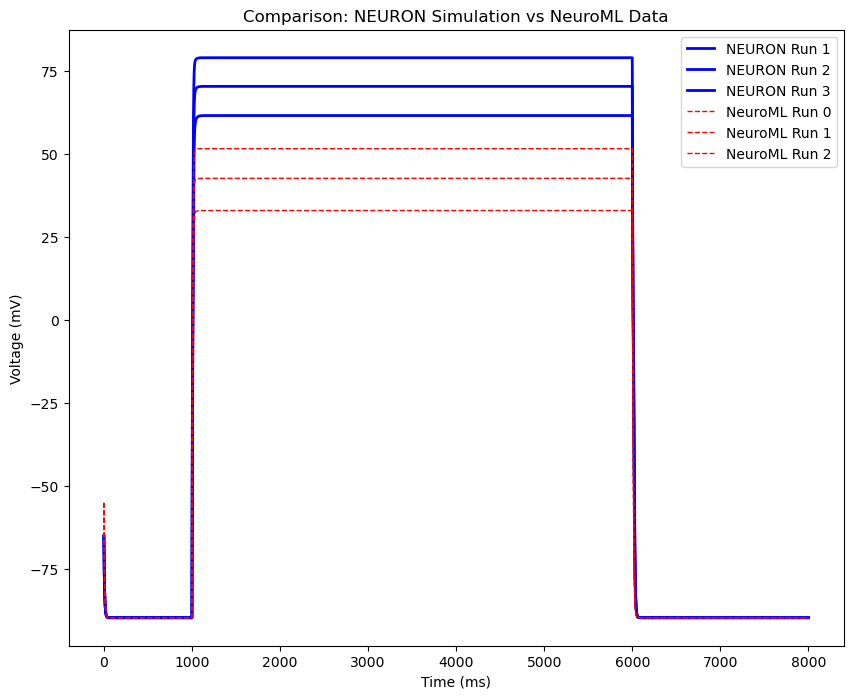

In [16]:
#matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# NEURON simulation data
for i in range(len(v)):
    plt.plot(time1[i], v[i], label=f'NEURON Run {i + 1}', linewidth=2, color='blue')

# NeuroML data
for col in nml_voltages.columns:
    plt.plot(nml_time, df_AIY_NML[col], label=f'NeuroML {col}', linewidth=1, color='red', linestyle='--')


plt.title('Comparison: NEURON Simulation vs NeuroML Data')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')

plt.legend(loc='upper right')

plt.show()


In [ ]:
# PLOTLY

# # Create the Plotly figure
# fig = go.Figure()

# # Add NEURON simulation data to the plot
# fig = go.Figure()

# for i in range(len(v)):
#     fig.add_trace(
#         go.Scatter(
#             x=time1[i], 
#             y=v[i], 
#             mode='lines', 
#             name=f'NEURON Run {i + 1}', # Label each run
#             line = dict(color = 'blue', width = 2)
#         )
#     )



# # Add NeuroML data to the plot
# for col in nml_voltages.columns:
#     fig.add_trace(
#         go.Scatter(
#             x=nml_time,  # Time from NeuroML data
#             y=df_AIY_NML[col],  # Voltage from NeuroML data
#             mode='lines',
#             name=f'NeuroML {col}',  # Label for each trace
#             line=dict(color='red', dash='dash', width=1)
#         )
#     )

# # Update layout for clarity
# fig.update_layout(
#     title='Comparison: NEURON Simulation vs NeuroML Data',
#     xaxis_title='Time (ms)',
#     yaxis_title='Voltage (mV)',
#     template='plotly_white',
#     legend=dict(x=0.99, y=0.99),  # Adjust legend position
#     height=700,  
#     width=800   
# )

# # Show the plot
# fig.show()

In [1]:
!pynml NeuroML/LEMS_Sim_IClamp_AIY.xml

pyNeuroML >>> CRITICAL - Unable to find file: NeuroML/LEMS_Sim_IClamp_AIY.xml!
